# ROBOT TRADING


## Descripción del desafío

Vamos a contruir un Robot Trading en Python capaz de tomar decisiones de compra y venta de Bitcoin en tiempo real, ¿interesante verdad?, aqui te proporciono el paso a paso que deberás realizar: <br>

    1.- Configuración del ambiente: Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora. También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc. 

    2.- Obtención de datos: Necesitarás acceder a una API que proporcione datos históricos de precios de Bitcoin en formato JSON. Por otro lado, necesitarás realizar Web Scraping en un site de noticias para obtener el precio actual y algunos indicadores de tendencias del Bitcoin.
    
    3.- Limpieza de datos: Una vez que tengas los datos históricos deberás cargarlos en un DataFrame de Pandas para poder manipularlos y analizarlos, deberás identificar y eliminar los outliers, además de tratar cualquier valor nulo o duplicados en la base. Finalmente, con la base limpia, calcula el precio promedio del Bitcoin.

    4.- Tomar decisiones: Una vez que tengas el precio promedio, compáralo con el precio actual y tendencia del Bitcoin, que previamente obtuviste con Web Scraping. Si el precio actual es mayor/igual que la media y la tendencia es de baja, entonces se debe vender, pero si el precio actual es menor que la media y la tendencia es de alta, entonces se debe comprar.

    5.- Visualización: Utiliza la librería Matplotlib para crear un gráfico donde se muestre la evolución del precio del Bitcoin durante el periodo seleccionado, y una línea recta que pase sobre el precio medio. Por último, muestra un mensaje en el gráfico que indique “Vender”, “Comprar” o “” según sea la decisión del algoritmo.

    6.- Automatización: Finalmente, ahora que tienes el algoritmo de decisión, es hora de automatizar el proceso. Utiliza la librería de Python "time" para ejecutar el algoritmo de decisión cada 5 minutos y actualizar el gráfico.

### Comenzamos<br>
Nuestro primer paso será: realizar la importación de las librerías necesarias para nuestro desarrollo.<br>
Algunas son muy comunes como Pandas, Numpy, Matplotlib o DateTime, pero aquí se utilizará una librería que no fue tratada durante nuestras clases: <br>

<strong>"Yfinance"</strong> que es una biblioteca de Python que proporciona una interfaz conveniente para descargar datos financieros directamente de Yahoo Finance. Sobre la cual pueden aprender mucho mas en: https://pypi.org/project/yfinance/ y que será una parte importante de nuestro desarrollo.

In [1]:
import pandas as pd  #Libreria para el manejo de estruturas de datos
import numpy as np   #Libreria para el manejo de algunas operaciones matemáticas
import matplotlib.pyplot as plt #Libreria para trabajar con las gráficas necesarias
import yfinance as yf  #Libreria que nos dará acceso a los valores del Bitcoin
import datetime  #Libreria para apoyarnos con las operaciones direccionadas a fechas


Optando por una sencilla comprensión se crearán 5 variables globales que, serán manipuladas dentro de algunas funciones, así que las declaramos al inicio.<br>
 **df_bitcoin, actual_price, trend, bitcoin_mean,  decision_algorithm**

Para comprender la actualidad del valor del Bitcoin generaremos una función de la cual obtendremos el valor durante los ultimos 7 días en intervalos de 5 minutos, para lo cual se definirán 2 variables del tipo Datetime: <br><br>
    *end_date*, cuya función será almacenar nuestra fecha de cierre de recolección al día de hoy. <br>
    *start_date*,  que será la variable dónde comenzaremos la extracción de datos. 
    <br><br>
Después de generar las variables, con la función *download* de la libreria **yfinance** que nos permitirá obtener los datos del bitcoin("BTC-USD") en los intervalos que necesitaremos para nuestro análisis, y con ellos crearemos el DataFrame llamado Bitcoin_data.

In [2]:
def import_bitcoin_database(): #Función para automatizar la tarea de extracción
    global df_bitcoin

    end_date = datetime.datetime.now() #Fecha para detener la busqueda de datos
    start_date = end_date - datetime.timedelta(days=7) #Fecha de inicio de busqueda de datos

    df_bitcoin = yf.download("BTC-USD", start_date, end_date,interval="5m") #función para obtener el tipo de moneda con los intervalos asignados


Nos aseguramos que la extracción de datos por medio de nuestra función sea correcta:

In [3]:
import_bitcoin_database()

[*********************100%%**********************]  1 of 1 completed


In [4]:
df_bitcoin.head(10) #Mostramos una muestra de 15 datos para ver cómo se distribuyen los datos

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-21 20:25:00+00:00,29974.464844,30026.759766,29974.464844,30025.906250,30025.906250,0
2023-10-21 20:30:00+00:00,30031.902344,30059.679688,30017.837891,30059.679688,30059.679688,22436864
2023-10-21 20:35:00+00:00,30068.884766,30068.884766,30047.251953,30048.259766,30048.259766,20297728
2023-10-21 20:40:00+00:00,30039.277344,30039.277344,29999.722656,30000.820312,30000.820312,0
2023-10-21 20:45:00+00:00,29997.832031,30012.710938,29997.832031,30012.710938,30012.710938,0
2023-10-21 20:50:00+00:00,30007.736328,30012.314453,30003.404297,30003.404297,30003.404297,8636416
2023-10-21 20:55:00+00:00,30010.498047,30023.316406,30009.974609,30023.316406,30023.316406,0
2023-10-21 21:00:00+00:00,30025.242188,30026.349609,30018.724609,30026.349609,30026.349609,0
2023-10-21 21:05:00+00:00,30053.988281,30053.988281,30032.984375,30032.984375,30032.984375,6287360


#### Información de DataFrame (df_bitcoin)

**Datetime**: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

**Open**: Contiene el precio del Bitcoin al inicio del intervalo (USD).

**High**: Contiene el precio más alto del Bitcoin durante el intervalo(USD).

**Low**: Contiene el precio más bajo del Bitcoin durante el intervalo(USD).

**Close**: Contiene el precio del Bitcoin al final del intervalo(USD).

**Volume**: Contiene el total de transacciones hechas durante el intervalo.

#### Una vez que hayamos comprendido nuestro DataFrame, hacemos impresión del numero total de datos obtenidos

In [5]:
len(df_bitcoin)

1995

## Extracción de tendencia

En está sección nos enfocaremos en obtener la tendencia de los valores del Bitcoin de la siguiente página web: https://coinmarketcap.com, de dónde extraeremos el valor actual del Bitcoin con su ultima actualización en dólares (USD), su variación de su precio en la última hora.

In [6]:
from bs4 import BeautifulSoup #Libreria para trabar con los objetos HTML
import requests               #Libreria para trabajar las solicitudes HTTP

Para poder realizar el Web Scraping utilizaremos la libreria **BeautifulSoup de bs4**, de la cúal podemos obtener su documentación de la siguiente dirección: https://beautiful-soup-4.readthedocs.io/en/latest/ <br>
Ademas del modulo **requests** para utilizar llamadas HTTP, pueden encontrar la documentación de la libreria en la siguiente dirección: <br>https://pypi.org/project/requests/

In [7]:
def trends_extract():
    global actual_price, trend

    url = "https://coinmarketcap.com"
    response = requests.get(url)

    if response.status_code == 200: #El 200 significa que la petición fue exitosa
        response.encoding = 'utf-8'  # Especifica la codificación para decodificar los caracteres
        html = response.text    #Guardamos los datos de respuestas ya decodificados
        soup = BeautifulSoup(html, "html.parser") #Generamos un objeto del tipo beautifulsoup
    else:
            print("Failed to retrieve the webpage.") #En caso de un error

    #Obtenemos el valor de la moneda actual, le quitamos el signo $ y "," 
    # para obtener solo el valor y decimales, y poder convertirlo a FLOAT
    actual_price = soup.find("div", class_="sc-a0353bbc-0 gDrtaY").getText() 
    actual_price = float(actual_price.replace("$", "").replace(",", ""))
    
    #Accedemos a la tendencía de la misma manera
    icon_trend = soup.findChild("span", class_="icon-Caret-up")

    #Asignamos un valor en caso de crezca o decrezca la tendencia
    if ['icon-Caret-down'] == icon_trend.get("class"):
        trend = "Baja"
    elif ['icon-Caret-up'] == icon_trend.get("class"):
        trend = "Alta"


Pasamos a verificar que la función extraiga correctamente los valores necesarios para continuar con el programa <br>
y verificamos que las variables tengan sus respectivos valores cargados

In [8]:
#Ejecución de función de WebScraping
trends_extract()

#Impresión de las variables necesarias para validación
print(actual_price)
print(type(actual_price))
print(trend)

34006.55
<class 'float'>
Alta


## Exploraración de los datos

Esta exploración será realizada para comprender el contexto de la información, familiarizarnos con la misma, y comenzar a realizar algunas ideas de como abordaremos la creación del modelo.

In [9]:
#Mostramos un resumen breve del typo de datos que contiene nuestro DataFrame, numero de entradas, columnas, así como datos erroneos o nulos
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1995 entries, 2023-10-21 20:25:00+00:00 to 2023-10-28 20:20:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1995 non-null   float64
 1   High       1995 non-null   float64
 2   Low        1995 non-null   float64
 3   Close      1995 non-null   float64
 4   Adj Close  1995 non-null   float64
 5   Volume     1995 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.1 KB


In [10]:
#Ejecución de algunas estadística descriptivas para entender númericamente la distribución de nuestros datos.
df_bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1.995000e+03
mean,32997.952930,33020.167955,32976.843789,32999.856000,32999.856000,3.255069e+07
std,1808.513219,1811.985224,1803.785586,1807.980693,1807.980693,1.200392e+08
min,29753.654297,29773.673828,29720.312500,29745.027344,29745.027344,0.000000e+00
25%,30799.217773,30813.891602,30771.951172,30808.044922,30808.044922,0.000000e+00
50%,34011.257812,34030.816406,33986.894531,34013.285156,34013.285156,0.000000e+00
75%,34177.550781,34195.001953,34159.218750,34182.064453,34182.064453,2.571622e+07
max,35116.218750,35150.433594,34950.511719,35044.105469,35044.105469,3.556581e+09


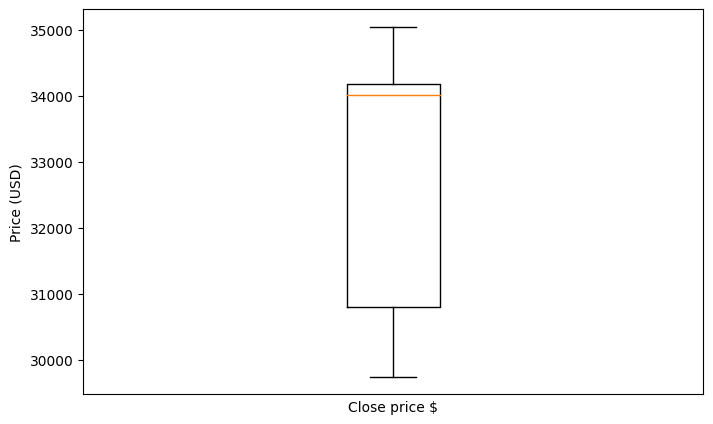

In [11]:
# Mostraremos una gráfica de caja para una rapida y grafica comprensión de los datos

plt.figure("figure", figsize=(8,5))
plt.boxplot(df_bitcoin["Close"])
plt.xlabel("Close price $")
plt.ylabel("Price (USD)")
plt.xticks([])
plt.show()

## Limpieza de información


En esta sección nos enfocaremos en la limpieza de los datos obtenidos anteriormente. <br><br>
La limpieza se abordará de la siguiente manera, en lo posible: <br>

-Generar una copia de la base df_bitcoin para realizar la limpieza en esta nueva base(df_clean_bitcoin), sin modificar la base original. <br> 
-Para la limpieza, se utilizaran los atributos(Columnas): Datetime, Close y Volume. <br>
<blockquote>
        -<strong>Datetime</strong>: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.<br>
        -<strong>Close</strong>: Contiene el precio del Bitcoin al final del intervalo.<br>
        -<strong>Volume</strong>: Contiene el total de transacciones hechas durante el intervalo.<br>
</blockquote>
-Identificar duplicados en el atributo "Datetime" y tratarlos para almacenar sólo índices únicos. <br>
-Buscar valores nulos en la columna Close y trátarlos.<br>
-Verificar que todos los registros de la base tengan un Volumen(Volume) de transacción mayor a 0, caso contrário, elimínarlos.<br>
-identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utilizando un gráfico de boxplot para identificarlos.<br>
-Filtrar o seleccionar únicamente los registros cuyo precio(Close) se encuentre entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot generado.<br>
-Finalmente, calcular el precio promedio de la columna "Close" y guardaremos el valor en la variable bitcoin_mean.<br>

In [12]:
def data_cleaning():
    global df_clean_bitcoin, bitcoin_mean
    
    #Creamos un DF con la copia de los valores obtenidos 
    df_clean_bitcoin = df_bitcoin.copy()
    df_clean_bitcoin = df_clean_bitcoin.reset_index()

    #Limpieza de datos duplicados en el atributo "Datetime"
    df_clean_bitcoin = df_clean_bitcoin.drop_duplicates(subset=["Datetime"])
    #Eliminamos valores nulos del atributo "Close"
    df_clean_bitcoin = df_clean_bitcoin[df_clean_bitcoin.Close.notnull()]
    #Obtenemos solo aquellos valores del atributo "Volume" que sean mayores a "0"
    df_clean_bitcoin = df_clean_bitcoin[df_clean_bitcoin["Volume"]>0]
    

    #Filtra o selecciona únicamente los registros cuyo precio("Close") se 
    # encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3)
    valor = df_clean_bitcoin["Close"]
    Q1 = valor.quantile(.25)
    Q3 = valor.quantile(.75)
    seleccion = (valor >= Q1) & (valor <= Q3)
    df_clean_bitcoin = df_clean_bitcoin[seleccion]
    df_clean_bitcoin = df_clean_bitcoin.reset_index(drop=True)

    #Calcular la media del atributo "Close"
    bitcoin_mean = df_clean_bitcoin["Close"].mean()


Una vez que hayamos desarrollado la función que obtendrá nuestro diversor valores de limpieza, procedemos a validar la información. <br>
<br>
Ejecutamos nuestra función:

In [13]:
#Ejecución de la función de limpieza de datos
data_cleaning()

#Impresión de variables resultantes
print(bitcoin_mean)

32684.32010076742


In [14]:
#Impresión de DataFrame resultante de la limpieza de datos
df_clean_bitcoin

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-10-23 03:45:00+00:00,30507.335938,30579.982422,30507.335938,30568.796875,30568.796875,149003264
1,2023-10-23 03:50:00+00:00,30650.539062,30683.857422,30602.603516,30614.169922,30614.169922,348778496
2,2023-10-23 03:55:00+00:00,30665.847656,30747.738281,30665.847656,30734.943359,30734.943359,188186624
3,2023-10-23 04:00:00+00:00,30728.923828,30791.951172,30714.619141,30791.951172,30791.951172,263048192
4,2023-10-23 04:05:00+00:00,30785.207031,30792.054688,30652.412109,30652.412109,30652.412109,82834432
...,...,...,...,...,...,...,...
447,2023-10-28 16:20:00+00:00,34135.382812,34159.472656,34130.847656,34159.472656,34159.472656,1094656
448,2023-10-28 16:30:00+00:00,34161.824219,34163.316406,34158.253906,34158.394531,34158.394531,2390016
449,2023-10-28 16:35:00+00:00,34150.394531,34162.226562,34146.195312,34154.171875,34154.171875,5474304
450,2023-10-28 16:40:00+00:00,34154.285156,34154.285156,34131.781250,34135.996094,34135.996094,5342208


## Toma de decisiones

#### Con la obtención de datos por medio de la limpieza, podremos continuar para generar nuestra decisión acerca de como abordar la tendencia:

1.- Sí el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.<br>
2.- Sí el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.<br>
3.- Sí ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor 'Esperar'.<br>

Este es un algoritmo de decisión simple que ayuda a los clientes inexpertos a conocer el mejor momento de comprar o vender Bitcoin, ¿crees que existan otros indicadores en la base o en el site de noticias o algún criterio de decisión adicional que ayudaría a reforzar el algoritmo de decisión? Te invito a descubrir otras alternativas.




In [15]:
def decision():
    global decision_algorithm, marker, marker_color

    #Ciclo para asignar la decisión con base en 2 resultados:
    # la media del cierre(Close) de la moneda y su tendencia(trend).
    
    if actual_price > bitcoin_mean and trend == "Alta":
        decision_algorithm = "Sell"
        marker = "^"
        marker_color = "Green"
    elif actual_price < bitcoin_mean and trend == "Baja":
        decision_algorithm = "Buy"
        marker = "v"
        marker_color = "Red"
    else:
        decision_algorithm = "Wait"
        marker = ">"
        marker_color = "Purple"


Continuamos con la prueba de nuestra función, validando que el resultado sea una decisión entre 3 posibles escenarios: **Sell**, **Buy** y **Wait**

In [16]:
#Ejecución de nuestra función de decision de tendencia
decision()

#Se realiza la impresión de las variables esperadas, para validar su información
print(decision_algorithm) #Decisión resultante
print(marker)             #Tendencia
print(marker_color)       #Color para representar la tendencia

Sell
^
Green


## Visualización

Una vez hayamos realizado todos nuestros procesos de limpieza, así como los procesos de decisión, utilizaremos la información obtenida para desarrollar un gráfico en el cual se muestre la tendencía de los valores del Bitcoin durante el transcurso de los ultimos días.

In [17]:
def data_visualization():
    global df_bitGraph

    #Generamos una DataFrame para trabajar la representación gráfica.
    df_bitGraph = df_bitcoin.copy()
    #Añadimos una columna que contenga el valor promedio.
    df_bitGraph["Average"] = bitcoin_mean

    #Creamos el lienzo de nuestra gráfica.
    plt.rc("figure", figsize = (16,5))
    #Graficamos el valor de cierre, con relación al índice.
    plt.plot(df_bitGraph.index, df_bitcoin["Close"], label="Close", color = "green")
    #Ahora graficamos el promedio, igualmente versus el índice.
    plt.plot(df_bitGraph.index, df_bitGraph["Average"], label="Average", color="black", linestyle = "--")

    #Agregamos una representación distinta al último valor obtenido.
    #Obtenemos el último valor del índice
    last_index = df_bitGraph.index[-1] 
    #último valor en la columna de cierre de precio.
    last_close = df_bitGraph['Close'].iloc[-1] 
    #Graficamos el último punto, con una forma y orientación distinta así como su color según rendencia.
    plt.scatter(last_index, last_close, color=marker_color, marker=marker, s=70)

    #PARTE VISUAL DEL GRÁFICO.

    #Aquí eliminamos las líneas del borde del gráfico
    ax = plt.gca()
    ax.spines["right"].set_color("None")
    ax.spines["top"].set_color("None")
    ax.spines["bottom"].set_color("None")
    ax.spines["left"].set_color("None")

    plt.grid(visible=True)  #Visualizamos la cuadrícula del gráfico.
    plt.title("Bitcoin Price Analysis and Trading Trends") #Actualizamos el título.
    plt.xlabel('Date (YYYY-MM-DD)', fontdict={"weight":"bold"}) #Actualizamos el nombre del eje X,
    plt.ylabel('Closing price (USD)', fontdict={"weight":"bold"}) #Actualizamos el nombre del eje y.
    plt.legend(loc="lower right") #Genramos la leyenda y ajustamos su posición.

    #Ahora mostramos en el gráfico cual fue la decisión resultante de nuestro algoritmo para esta muestra de datos.
    plt.annotate(decision_algorithm, xy=(.95, 0.7), xycoords='axes fraction', fontsize=16, color='purple', weight = "bold")

    #Y graficamos.
    plt.show()


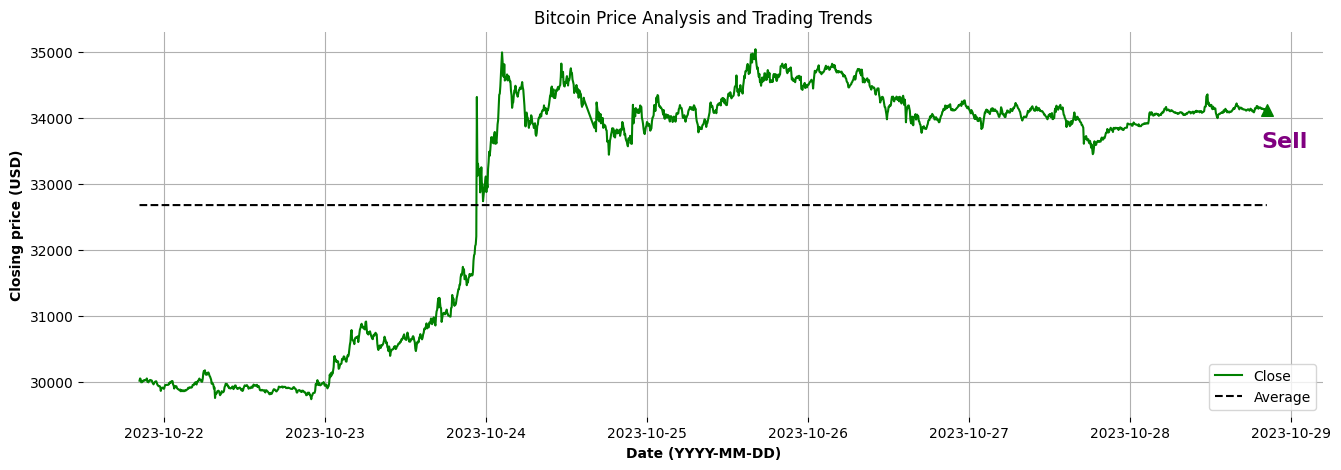

In [18]:
#Realizamos la ejecución de la función de visualización
data_visualization()

## Automatización

Para finalizar con nuestro análisis, desarrollaremos la solución para que se ejecute de manera automática con ayuda de algunas librerias como lo son: <br>
**IPython.display** y **Time**

In [19]:
from IPython.display import clear_output #Libreria necesaria para actualizar limpiar los resultados de pantalla
import time                             #Utilizado para funciones referente a tiempo

Una vez que tenemos todas nuestras funciones hechas y validadas, procederemos a crear un ciclo infinito, en el cual se harán intervalos de 5 minutos para volver a correr la instrucción, que obtendrá todas la información necesaria a traves de las funciones y generá un gráfico actualizado en cada ciclo

[*********************100%%**********************]  1 of 1 completed


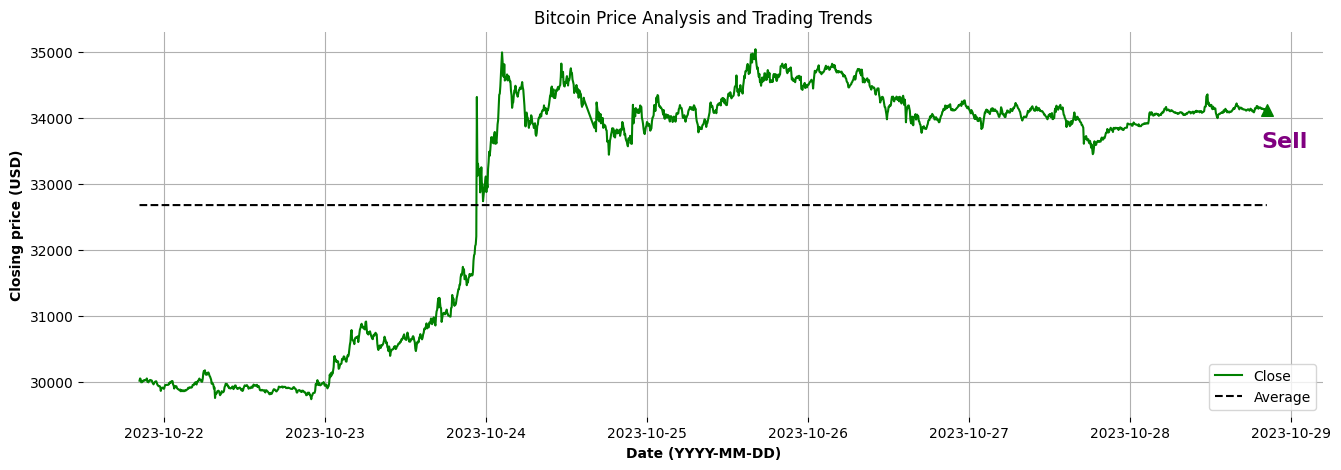

In [20]:
while(True):
    clear_output()            #Función para limpiar la gráfica y generar una nueva.
    import_bitcoin_database() #Importamos los datos desde yfinance.
    trends_extract()          #WebScraping de página web.
    data_cleaning()           #Limpieza de datos
    decision()                #Algoritmo de decisión
    data_visualization()      #Representación gráfica de la información
    time.sleep(300)           #Tiempo de espera antes de volver a iniciar el ciclo
  